In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

# Exploratory Data Analysis

C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

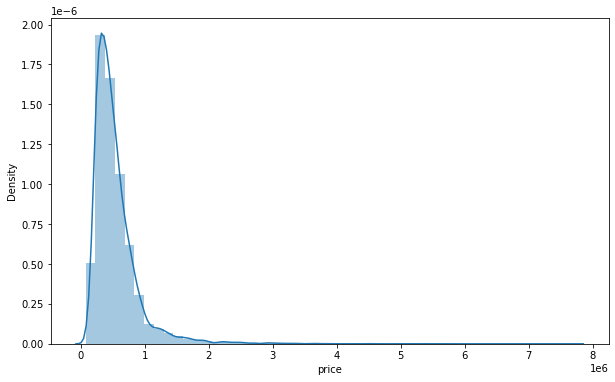

In [3]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

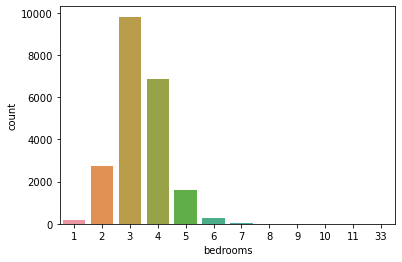

In [4]:
sns.countplot(df['bedrooms'])

In [5]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

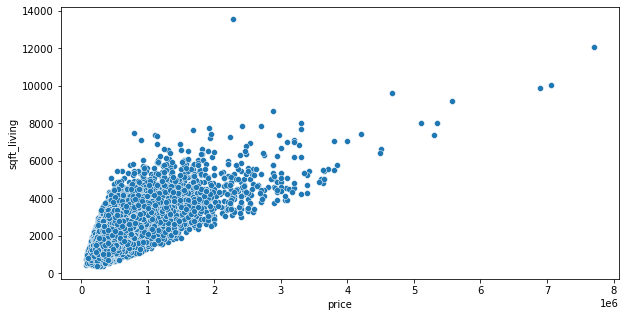

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

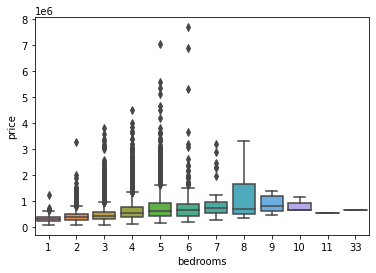

In [8]:
sns.boxplot(data=df,x='bedrooms',y='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

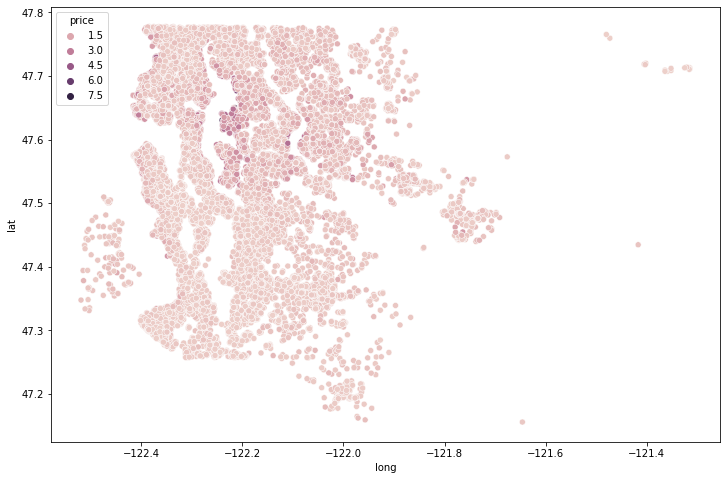

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='long',y='lat',hue='price')

In [13]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

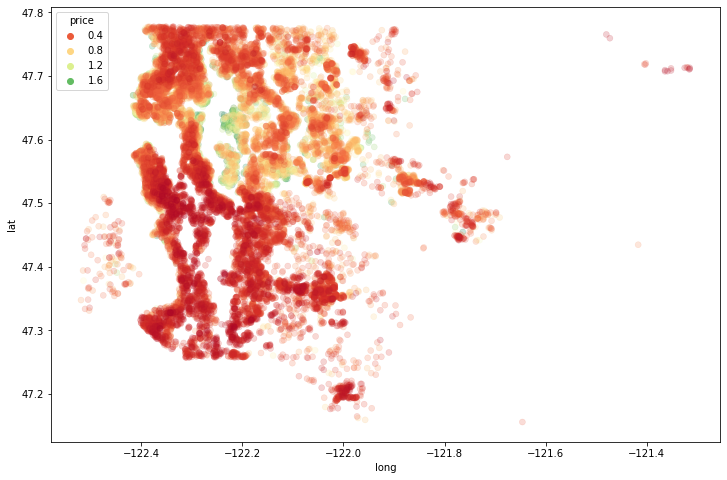

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_perc,x='long',y='lat',hue='price',
               edgecolor=None,alpha=0.2,palette='RdYlGn')

In [18]:
df = df.drop('id',axis=1)

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

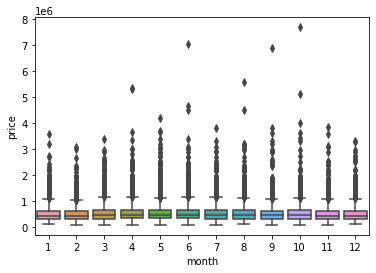

In [23]:
sns.boxplot(x='month',y='price',data=df)

In [27]:
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)

KeyError: "['date'] not found in axis"

# Data Preprocessing and Creating a Model


In [29]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
from tensorflow.keras.models import Sequentialquential
from tensorflow.keras.layers import Dense

In [37]:
X_train.shape

(15117, 19)

In [38]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [39]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 12ms/step - loss: 432433805448.5333 - val_loss: 418883305472.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 448706105890.1334 - val_loss: 415065014272.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 415364467097.6000 - val_loss: 380797452288.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 366508796859.7333 - val_loss: 261348589568.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 229276420915.2000 - val_loss: 120083046400.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 114259978240.0000 - val_loss: 95309848576.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 105733327872.0000 - val_loss: 93657006080.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 92973653333.3333 - val_loss: 92088958976.0000
Epoch 9/400
119/119

119/119 [==============================] - 0s 1ms/step - loss: 35387993600.0000 - val_loss: 36175552512.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 35266232200.5333 - val_loss: 35991396352.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 37279327505.0667 - val_loss: 35818119168.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 36147659298.1333 - val_loss: 35733217280.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 36755202406.4000 - val_loss: 35476340736.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 35086787840.0000 - val_loss: 35341504512.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37787479005.8667 - val_loss: 35217260544.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 35173641932.8000 - val_loss: 35040292864.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 32000805512.5333 - val_loss: 31425531904.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 30459680170.6667 - val_loss: 31329998848.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 31526258756.2667 - val_loss: 31341193216.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 33321645056.0000 - val_loss: 31243151360.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 31536609894.4000 - val_loss: 31193753600.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 33268846421.3333 - val_loss: 31181004800.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 33357049548.8000 - val_loss: 31160815616.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32086769297.0667 - val_loss: 31103479808.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 30377747029.3333 - val_loss: 29850968064.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31559021107.2000 - val_loss: 29556142080.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31393617015.4667 - val_loss: 29541384192.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 32786644718.9333 - val_loss: 29515337728.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 32527738026.6667 - val_loss: 29571506176.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 29415712102.4000 - val_loss: 29485993984.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 32061067588.2667 - val_loss: 29485395968.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 30795720669.8667 - val_loss: 29441802240.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30696598545.0667 - val_loss: 28524875776.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 29872954129.0667 - val_loss: 28490524672.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30526515456.0000 - val_loss: 28467230720.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 31107830818.1333 - val_loss: 28482701312.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30433551360.0000 - val_loss: 28584800256.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30298398771.2000 - val_loss: 28426280960.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30812175172.2667 - val_loss: 28402759680.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 31283262498.1333 - val_loss: 28415662080.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29276691780.2667 - val_loss: 27600568320.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 28420848793.6000 - val_loss: 27606749184.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 31064733952.0000 - val_loss: 27583240192.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29125142391.4667 - val_loss: 27674357760.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 31310811477.3333 - val_loss: 27551893504.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 29923311940.2667 - val_loss: 27695411200.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 28318736401.0667 - val_loss: 27665223680.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 28240873062.4000 - val_loss: 27512883200.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29551856332.8000 - val_loss: 26804506624.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29581465924.2667 - val_loss: 26820886528.0000


# Model Evaluation and Predicts

In [40]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

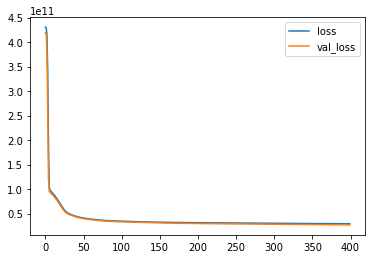

In [41]:
losses.plot()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [43]:
predictions = model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test,predictions))

163770.8303606435

In [46]:
mean_absolute_error(y_test,predictions)

100999.79861352238

In [47]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [48]:
explained_variance_score(y_test,predictions)

0.7978284025182263

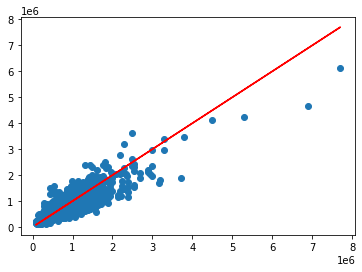

In [50]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [51]:
single_house = df.drop('price',axis=1).iloc[0]

In [52]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
model.predict(single)